In [2]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [3]:
library(DiffBind)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


At

In [4]:
CorcesDataInfo =read.csv("./Corces2016_with_calderon_pDC_complete_meta.csv",
                          sep = ";",stringsAsFactors=FALSE) #, header=TRUE,row.names=NULL
head(CorcesDataInfo)

,SampleID,Tissue,Condition,donorID,Treatment,bamReads,Replicate,ControlID,Peaks,PeakCaller,SRRID
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,Bcell_1,Bcell,Bcell,1022,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-0/execution/SRR2920492_1.fastq.trim.srt.nodup.no_chrM_MT.bam,1,Bcell,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Bcell/SRR2920492_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920492
2,Bcell_2,Bcell,Bcell,4983,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-1/execution/SRR2920513_1.fastq.trim.srt.nodup.no_chrM_MT.bam,2,Bcell,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Bcell/SRR2920513_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920513
3,Bcell_3,Bcell,Bcell,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-2/execution/SRR2920517_1.fastq.trim.srt.nodup.no_chrM_MT.bam,3,Bcell,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Bcell/SRR2920517_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920517
4,Bcell_4,Bcell,Bcell,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-3/execution/SRR2920544_1.fastq.trim.srt.nodup.no_chrM_MT.bam,4,Bcell,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Bcell/SRR2920544_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920544
5,CD4Tcell_1,CD4Tcell,CD4Tcell,1022,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CD4Tcell/atac/aaead0dc-374c-4a33-b443-e7bd45c3b3b6/call-filter/shard-0/execution/SRR2920493_1.fastq.trim.srt.nodup.no_chrM_MT.bam,1,CD4Tcell,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CD4Tcell/SRR2920493_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920493
6,CD4Tcell_2,CD4Tcell,CD4Tcell,2596,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CD4Tcell/atac/aaead0dc-374c-4a33-b443-e7bd45c3b3b6/call-filter/shard-1/execution/SRR2920496_1.fastq.trim.srt.nodup.no_chrM_MT.bam,2,CD4Tcell,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CD4Tcell/SRR2920496_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920496


In [5]:
tail(CorcesDataInfo)

,SampleID,Tissue,Condition,donorID,Treatment,bamReads,Replicate,ControlID,Peaks,PeakCaller,SRRID
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
75,ERY_3,ERY,ERY,2596,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Ery/atac/30c40953-158a-4029-83dd-b3902a172e43/call-filter/shard-2/execution/SRR2920504_1.fastq.trim.srt.nodup.no_chrM_MT.bam,3,ERY,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Ery/SRR2920504_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920504
76,ERY_4,ERY,ERY,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Ery/atac/30c40953-158a-4029-83dd-b3902a172e43/call-filter/shard-3/execution/SRR2920523_1.fastq.trim.srt.nodup.no_chrM_MT.bam,4,ERY,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Ery/SRR2920523_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920523
77,ERY_5,ERY,ERY,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Ery/atac/30c40953-158a-4029-83dd-b3902a172e43/call-filter/shard-4/execution/SRR2920524_1.fastq.trim.srt.nodup.no_chrM_MT.bam,5,ERY,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Ery/SRR2920524_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920524
78,ERY_6,ERY,ERY,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Ery/atac/30c40953-158a-4029-83dd-b3902a172e43/call-filter/shard-5/execution/SRR2920525_1.fastq.trim.srt.nodup.no_chrM_MT.bam,6,ERY,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Ery/SRR2920525_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920525
79,ERY_7,ERY,ERY,6926,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Ery/atac/30c40953-158a-4029-83dd-b3902a172e43/call-filter/shard-6/execution/SRR2920529_1.fastq.trim.srt.nodup.no_chrM_MT.bam,7,ERY,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Ery/SRR2920529_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920529
80,ERY_8,ERY,ERY,6926,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Ery/atac/30c40953-158a-4029-83dd-b3902a172e43/call-filter/shard-7/execution/SRR2920530_1.fastq.trim.srt.nodup.no_chrM_MT.bam,8,ERY,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/Ery/SRR2920530_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920530


In [6]:
corces_DBdata <- dba(sampleSheet=CorcesDataInfo) 

Bcell_1 Bcell  Bcell control 1 bed

Bcell_2 Bcell  Bcell control 2 bed

Bcell_3 Bcell  Bcell control 3 bed

Bcell_4 Bcell  Bcell control 4 bed

CD4Tcell_1 CD4Tcell  CD4Tcell control 1 bed

CD4Tcell_2 CD4Tcell  CD4Tcell control 2 bed

CD4Tcell_3 CD4Tcell  CD4Tcell control 3 bed

CD4Tcell_4 CD4Tcell  CD4Tcell control 4 bed

CD4Tcell_5 CD4Tcell  CD4Tcell control 5 bed

CD8Tcell_1 CD8Tcell  CD8Tcell control 1 bed

CD8Tcell_2 CD8Tcell  CD8Tcell control 2 bed

CD8Tcell_3 CD8Tcell  CD8Tcell control 3 bed

CD8Tcell_4 CD8Tcell  CD8Tcell control 4 bed

CD8Tcell_5 CD8Tcell  CD8Tcell control 5 bed

Mono_1 Mono  Mono control 1 bed

Mono_2 Mono  Mono control 2 bed

Mono_3 Mono  Mono control 3 bed

Mono_4 Mono  Mono control 4 bed

Mono_5 Mono  Mono control 5 bed

Mono_6 Mono  Mono control 6 bed

NKcell_1 NKcell  NKcell control 1 bed

NKcell_2 NKcell  NKcell control 2 bed

NKcell_3 NKcell  NKcell control 3 bed

NKcell_4 NKcell  NKcell control 4 bed

NKcell_5 NKcell  NKcell control 5 bed

NKcell_6 NKce

In [7]:
corces_DBdata

80 Samples, 926535 sites in matrix:
           ID   Tissue Condition Treatment Replicate
1     Bcell_1    Bcell     Bcell   control         1
2     Bcell_2    Bcell     Bcell   control         2
3     Bcell_3    Bcell     Bcell   control         3
4     Bcell_4    Bcell     Bcell   control         4
5  CD4Tcell_1 CD4Tcell  CD4Tcell   control         1
6  CD4Tcell_2 CD4Tcell  CD4Tcell   control         2
7  CD4Tcell_3 CD4Tcell  CD4Tcell   control         3
8  CD4Tcell_4 CD4Tcell  CD4Tcell   control         4
9  CD4Tcell_5 CD4Tcell  CD4Tcell   control         5
10 CD8Tcell_1 CD8Tcell  CD8Tcell   control         1
11 CD8Tcell_2 CD8Tcell  CD8Tcell   control         2
12 CD8Tcell_3 CD8Tcell  CD8Tcell   control         3
13 CD8Tcell_4 CD8Tcell  CD8Tcell   control         4
14 CD8Tcell_5 CD8Tcell  CD8Tcell   control         5
15     Mono_1     Mono      Mono   control         1
16     Mono_2     Mono      Mono   control         2
17     Mono_3     Mono      Mono   control         3
18     Mon

In [8]:
corces <- dba.count(corces_DBdata)


Computing summits...



ERROR: Error in mcfork(): unable to fork, possible reason: Cannot allocate memory


In [8]:
# loading the data ran in the clusters due to memory issue.
corces <- readRDS("/project/scATAC_analysis/NeurIPS2021_BM_scmultiome/analysis/bulk_diff_accessible_regions/outs/DiffAcc_countData.RData")


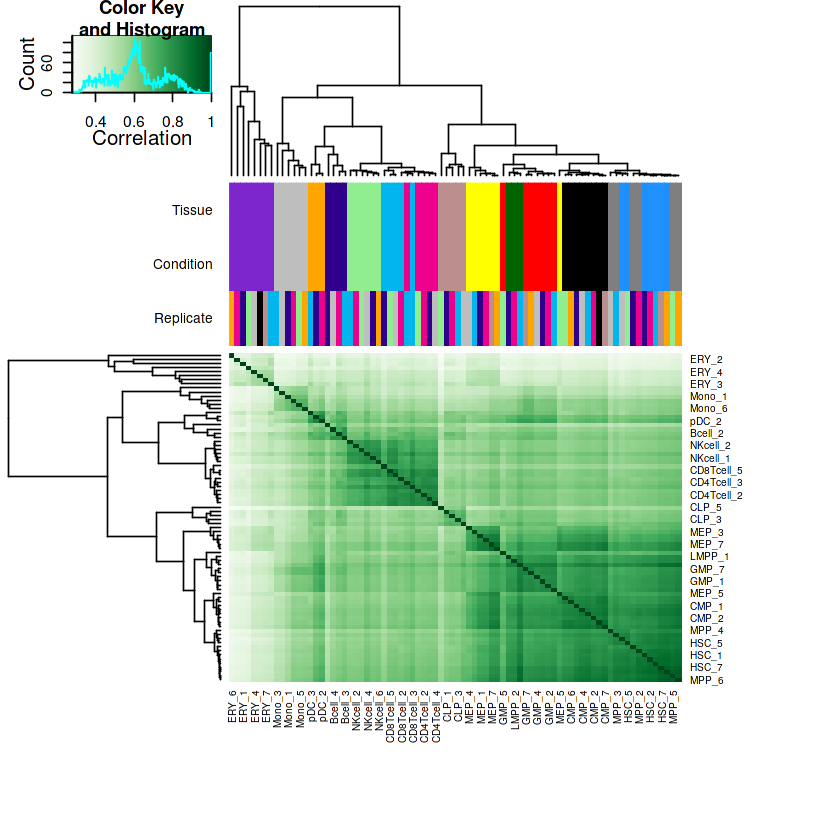

In [9]:
plot(corces,)

In [10]:
info <- dba.show(corces)
libsizes <- cbind(LibReads=info$Reads, FRiP=info$FRiP,PeakReads=round(info$Reads * info$FRiP))
rownames(libsizes) <- info$ID
libsizes

,LibReads,FRiP,PeakReads
Bcell_1,10633743,0.25,2658436
Bcell_2,33051601,0.32,10576512
Bcell_3,12871788,0.46,5921022
Bcell_4,2908237,0.57,1657695
CD4Tcell_1,5758439,0.62,3570232
CD4Tcell_2,10731358,0.51,5472993
CD4Tcell_3,15086963,0.42,6336524
CD4Tcell_4,8500373,0.53,4505198
CD4Tcell_5,7002029,0.48,3360974
CD8Tcell_1,4771124,0.41,1956161


In [11]:
corces_norm <- dba.normalize(corces)

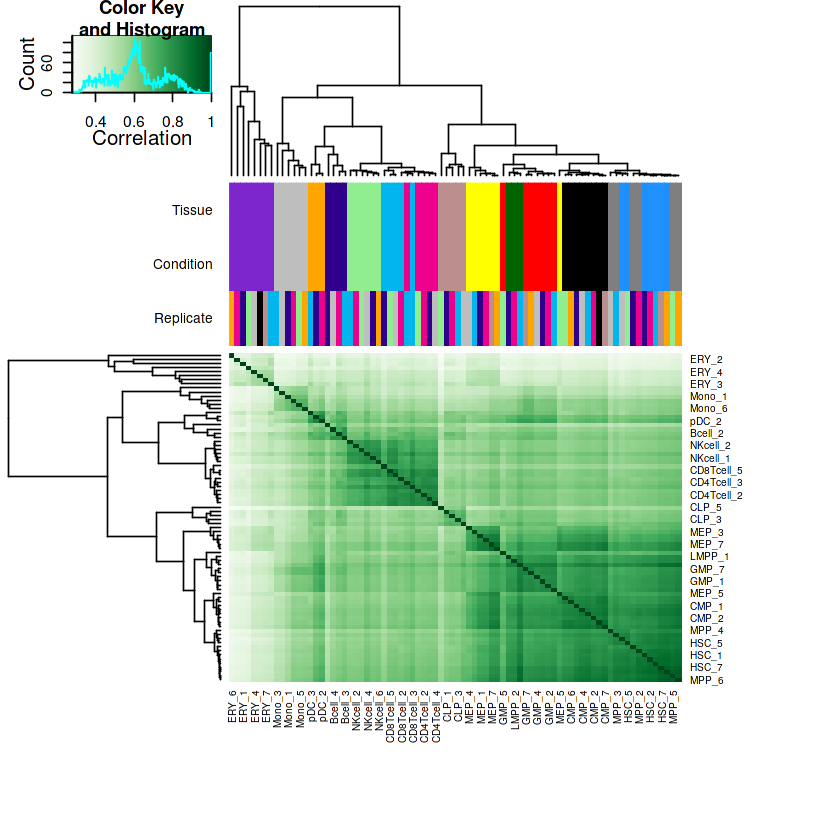

In [12]:
plot(corces_norm)

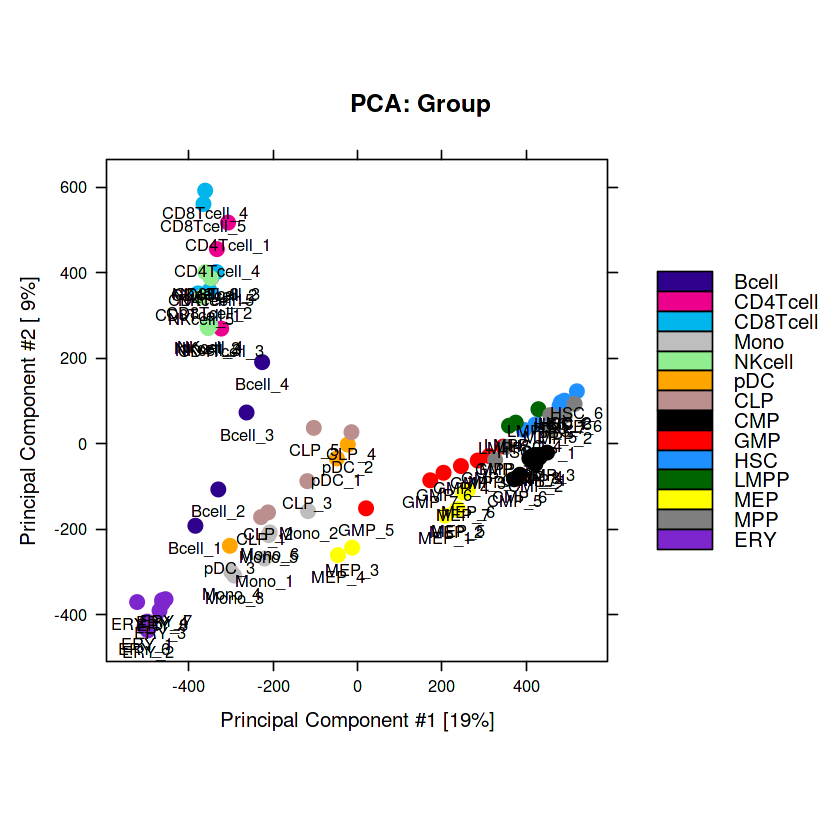

In [13]:
dba.plotPCA(corces_norm,  attributes=DBA_CONTROL, label=DBA_ID)

In [14]:
norm <- dba.normalize(corces_norm, bRetrieve=TRUE)
normlibs <- cbind(FullLibSize=norm$lib.sizes, NormFacs=norm$norm.factors, NormLibSize=round(norm$lib.sizes/norm$norm.factors))
rownames(normlibs) <- info$ID
normlibs

,FullLibSize,NormFacs,NormLibSize
Bcell_1,10633743,1.2212880,8706990
Bcell_2,33051601,3.7959846,8706990
Bcell_3,12871788,1.4783281,8706990
Bcell_4,2908237,0.3340117,8706990
CD4Tcell_1,5758439,0.6613582,8706990
CD4Tcell_2,10731358,1.2324991,8706990
CD4Tcell_3,15086963,1.7327415,8706990
CD4Tcell_4,8500373,0.9762700,8706990
CD4Tcell_5,7002029,0.8041848,8706990
CD8Tcell_1,4771124,0.5479648,8706990


In [15]:
corces_norm <- dba.contrast(corces_norm, categories=DBA_CONDITION,minMembers = 2)

Computing results names...



In [16]:
corces_norm

80 Samples, 674306 sites in matrix:
           ID   Tissue Condition Treatment Replicate    Reads FRiP
1     Bcell_1    Bcell     Bcell   control         1 10633743 0.25
2     Bcell_2    Bcell     Bcell   control         2 33051601 0.32
3     Bcell_3    Bcell     Bcell   control         3 12871788 0.46
4     Bcell_4    Bcell     Bcell   control         4  2908237 0.57
5  CD4Tcell_1 CD4Tcell  CD4Tcell   control         1  5758439 0.62
6  CD4Tcell_2 CD4Tcell  CD4Tcell   control         2 10731358 0.51
7  CD4Tcell_3 CD4Tcell  CD4Tcell   control         3 15086963 0.42
8  CD4Tcell_4 CD4Tcell  CD4Tcell   control         4  8500373 0.53
9  CD4Tcell_5 CD4Tcell  CD4Tcell   control         5  7002029 0.48
10 CD8Tcell_1 CD8Tcell  CD8Tcell   control         1  4771124 0.41
11 CD8Tcell_2 CD8Tcell  CD8Tcell   control         2 11230780 0.46
12 CD8Tcell_3 CD8Tcell  CD8Tcell   control         3 20228671 0.49
13 CD8Tcell_4 CD8Tcell  CD8Tcell   control         4  7618212 0.67
14 CD8Tcell_5 CD8Tcell  CD

In [19]:
corces_norm <- dba.analyze(corces_norm, bParallel = FALSE)

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg38

Applying blacklist...

Removed: 333 of 674306 intervals.

Re-normalizing...

Removed 333 (of 674306) consensus peaks.

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [20]:
dba.show(corces_norm, bContrasts=TRUE)

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,Bcell,4,CD4Tcell,5,52991
2,Condition,Bcell,4,CD8Tcell,5,57948
3,Condition,Bcell,4,Mono,6,47801
4,Condition,Bcell,4,NKcell,6,50420
5,Condition,Bcell,4,pDC,3,33780
6,Condition,Bcell,4,CLP,5,34479
7,Condition,Bcell,4,CMP,8,113428
8,Condition,Bcell,4,GMP,7,78467
9,Condition,Bcell,4,HSC,7,126614


In [21]:
Corces_B_vs_CD4 <- dba.report(corces_norm, contrast = 1)

In [22]:

Corces_B_vs_CD4_df = as.data.frame(Corces_B_vs_CD4)

In [23]:
head(Corces_B_vs_CD4_df)

,seqnames,start,end,width,strand,Conc,Conc_Bcell,Conc_CD4Tcell,Fold,p.value,FDR
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
487369,chr5,52725111,52725993,883,*,7.980656,1.887760,8.819229,-6.750117,8.387551e-65,3.132214e-59
317552,chr2,60819525,60819925,401,*,7.469205,2.443530,8.297383,-5.606886,1.572851e-62,2.936796e-57
616829,chr8,100430390,100431077,688,*,7.309955,2.689284,8.131650,-5.461267,1.524227e-54,1.897337e-49
26200,chr1,91804395,91805067,673,*,7.847034,2.293435,8.681314,-6.321597,1.026111e-53,9.579673e-49
335097,chr2,147663447,147664281,835,*,7.217443,2.399683,8.042523,-5.315633,1.455477e-52,1.087055e-47
208452,chr15,56043218,56043956,739,*,6.978346,2.221460,7.802430,-5.591391,2.133500e-52,1.327876e-47


write.table( x = data.frame(flow.DB.flowCont_vs_statContdf), file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/flowCont_vs_flowBmp9.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )

In [24]:
contrast_matrix = dba.show(corces_norm, bContrasts = TRUE)
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,Bcell,4,CD4Tcell,5,52991
2,Condition,Bcell,4,CD8Tcell,5,57948
3,Condition,Bcell,4,Mono,6,47801
4,Condition,Bcell,4,NKcell,6,50420
5,Condition,Bcell,4,pDC,3,33780
6,Condition,Bcell,4,CLP,5,34479
7,Condition,Bcell,4,CMP,8,113428
8,Condition,Bcell,4,GMP,7,78467
9,Condition,Bcell,4,HSC,7,126614


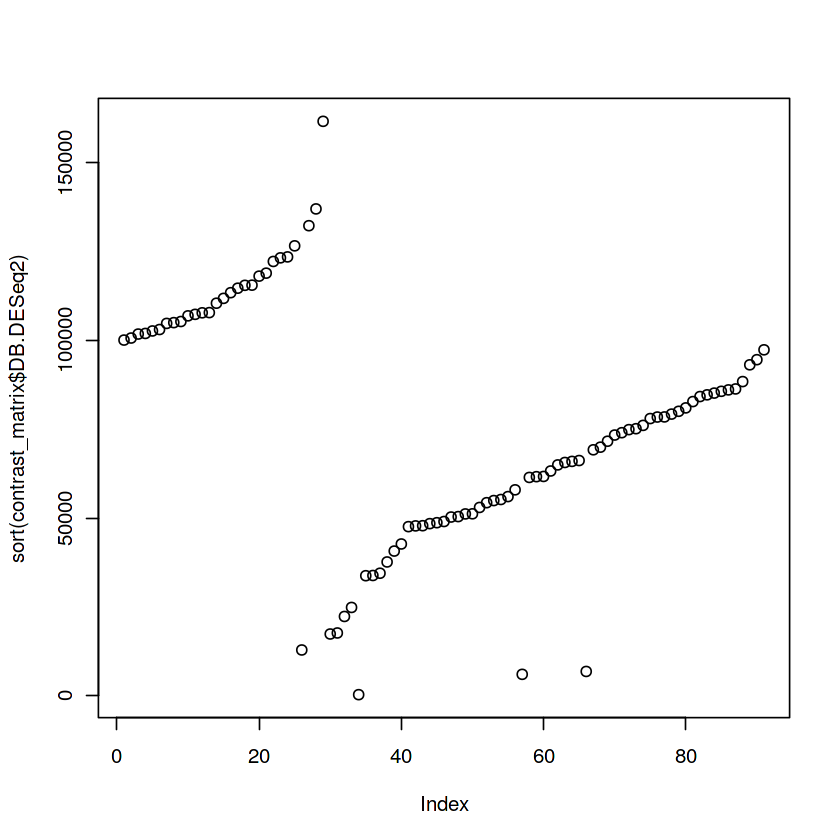

In [27]:
plot(sort(contrast_matrix$DB.DESeq2))

In [28]:
granges_to_df <- function(granges_obj, contrast){
    report <- dba.report(granges_obj, contrast = contrast)
    report_df <- as.data.frame(report)
    region= paste(report_df$seqnames,report_df$start,sep=":")
    region=paste(region,report_df$end,sep="-")
    report_df["region"]=region
    return(report_df)
}

In [29]:
for (i in seq(1, NROW(contrast_matrix))){
    save_name = paste( gsub("-", "_", contrast_matrix[i,2], fixed = TRUE) , "_VS_" ,gsub("-", "_", contrast_matrix[i,4], fixed = TRUE), sep="")
   # print(i)
    print(paste(save_name, "_df", sep = ""))
}

[1] "Bcell_VS_CD4Tcell_df"
[1] "Bcell_VS_CD8Tcell_df"
[1] "Bcell_VS_Mono_df"
[1] "Bcell_VS_NKcell_df"
[1] "Bcell_VS_pDC_df"
[1] "Bcell_VS_CLP_df"
[1] "Bcell_VS_CMP_df"
[1] "Bcell_VS_GMP_df"
[1] "Bcell_VS_HSC_df"
[1] "Bcell_VS_LMPP_df"
[1] "Bcell_VS_MEP_df"
[1] "Bcell_VS_MPP_df"
[1] "Bcell_VS_ERY_df"
[1] "CD4Tcell_VS_CD8Tcell_df"
[1] "CD4Tcell_VS_Mono_df"
[1] "CD4Tcell_VS_NKcell_df"
[1] "CD4Tcell_VS_pDC_df"
[1] "CD4Tcell_VS_CLP_df"
[1] "CD4Tcell_VS_CMP_df"
[1] "CD4Tcell_VS_GMP_df"
[1] "CD4Tcell_VS_HSC_df"
[1] "CD4Tcell_VS_LMPP_df"
[1] "CD4Tcell_VS_MEP_df"
[1] "CD4Tcell_VS_MPP_df"
[1] "CD4Tcell_VS_ERY_df"
[1] "CD8Tcell_VS_Mono_df"
[1] "CD8Tcell_VS_NKcell_df"
[1] "CD8Tcell_VS_pDC_df"
[1] "CD8Tcell_VS_CLP_df"
[1] "CD8Tcell_VS_CMP_df"
[1] "CD8Tcell_VS_GMP_df"
[1] "CD8Tcell_VS_HSC_df"
[1] "CD8Tcell_VS_LMPP_df"
[1] "CD8Tcell_VS_MEP_df"
[1] "CD8Tcell_VS_MPP_df"
[1] "CD8Tcell_VS_ERY_df"
[1] "Mono_VS_NKcell_df"
[1] "Mono_VS_pDC_df"
[1] "Mono_VS_CLP_df"
[1] "Mono_VS_CMP_df"
[1] "Mono_VS_GMP_df"
[

In [30]:
Bcell_VS_CD4Tcell_df = granges_to_df(corces_norm, contrast = 1)
Bcell_VS_CD8Tcell_df = granges_to_df(corces_norm, contrast = 2)
Bcell_VS_Mono_df = granges_to_df(corces_norm, contrast = 3)
Bcell_VS_NKcell_df = granges_to_df(corces_norm, contrast = 4)
Bcell_VS_pDC_df = granges_to_df(corces_norm, contrast = 5)
Bcell_VS_CLP_df = granges_to_df(corces_norm, contrast = 6)
Bcell_VS_CMP_df = granges_to_df(corces_norm, contrast = 7)
Bcell_VS_GMP_df = granges_to_df(corces_norm, contrast = 8)
Bcell_VS_HSC_df = granges_to_df(corces_norm, contrast = 9)
Bcell_VS_LMPP_df = granges_to_df(corces_norm, contrast = 10)
Bcell_VS_MEP_df = granges_to_df(corces_norm, contrast = 11)
Bcell_VS_MPP_df = granges_to_df(corces_norm, contrast = 12)
Bcell_VS_ERY_df = granges_to_df(corces_norm, contrast = 13)
CD4Tcell_VS_CD8Tcell_df = granges_to_df(corces_norm, contrast = 14)
CD4Tcell_VS_Mono_df = granges_to_df(corces_norm, contrast = 15)
CD4Tcell_VS_NKcell_df = granges_to_df(corces_norm, contrast = 16)
CD4Tcell_VS_pDC_df = granges_to_df(corces_norm, contrast = 17)
CD4Tcell_VS_CLP_df = granges_to_df(corces_norm, contrast = 18)
CD4Tcell_VS_CMP_df = granges_to_df(corces_norm, contrast = 19)
CD4Tcell_VS_GMP_df = granges_to_df(corces_norm, contrast = 20)
CD4Tcell_VS_HSC_df = granges_to_df(corces_norm, contrast = 21)
CD4Tcell_VS_LMPP_df = granges_to_df(corces_norm, contrast = 22)
CD4Tcell_VS_MEP_df = granges_to_df(corces_norm, contrast = 23)
CD4Tcell_VS_MPP_df = granges_to_df(corces_norm, contrast = 24)
CD4Tcell_VS_ERY_df = granges_to_df(corces_norm, contrast = 25)
CD8Tcell_VS_Mono_df = granges_to_df(corces_norm, contrast = 26)
CD8Tcell_VS_NKcell_df = granges_to_df(corces_norm, contrast = 27)
CD8Tcell_VS_pDC_df = granges_to_df(corces_norm, contrast = 28)
CD8Tcell_VS_CLP_df = granges_to_df(corces_norm, contrast = 29)
CD8Tcell_VS_CMP_df = granges_to_df(corces_norm, contrast = 30)
CD8Tcell_VS_GMP_df = granges_to_df(corces_norm, contrast = 31)
CD8Tcell_VS_HSC_df = granges_to_df(corces_norm, contrast = 32)
CD8Tcell_VS_LMPP_df = granges_to_df(corces_norm, contrast = 33)
CD8Tcell_VS_MEP_df = granges_to_df(corces_norm, contrast = 34)
CD8Tcell_VS_MPP_df = granges_to_df(corces_norm, contrast = 35)
CD8Tcell_VS_ERY_df = granges_to_df(corces_norm, contrast = 36)
Mono_VS_NKcell_df = granges_to_df(corces_norm, contrast = 37)
Mono_VS_pDC_df = granges_to_df(corces_norm, contrast = 38)
Mono_VS_CLP_df = granges_to_df(corces_norm, contrast = 39)
Mono_VS_CMP_df = granges_to_df(corces_norm, contrast = 40)
Mono_VS_GMP_df = granges_to_df(corces_norm, contrast = 41)
Mono_VS_HSC_df = granges_to_df(corces_norm, contrast = 42)
Mono_VS_LMPP_df = granges_to_df(corces_norm, contrast = 43)
Mono_VS_MEP_df = granges_to_df(corces_norm, contrast = 44)
Mono_VS_MPP_df = granges_to_df(corces_norm, contrast = 45)
Mono_VS_ERY_df = granges_to_df(corces_norm, contrast = 46)
NKcell_VS_pDC_df = granges_to_df(corces_norm, contrast = 47)
NKcell_VS_CLP_df = granges_to_df(corces_norm, contrast = 48)
NKcell_VS_CMP_df = granges_to_df(corces_norm, contrast = 49)
NKcell_VS_GMP_df = granges_to_df(corces_norm, contrast = 50)
NKcell_VS_HSC_df = granges_to_df(corces_norm, contrast = 51)
NKcell_VS_LMPP_df = granges_to_df(corces_norm, contrast = 52)
NKcell_VS_MEP_df = granges_to_df(corces_norm, contrast = 53)
NKcell_VS_MPP_df = granges_to_df(corces_norm, contrast = 54)
NKcell_VS_ERY_df = granges_to_df(corces_norm, contrast = 55)
pDC_VS_CLP_df = granges_to_df(corces_norm, contrast = 56)
pDC_VS_CMP_df = granges_to_df(corces_norm, contrast = 57)
pDC_VS_GMP_df = granges_to_df(corces_norm, contrast = 58)
pDC_VS_HSC_df = granges_to_df(corces_norm, contrast = 59)
pDC_VS_LMPP_df = granges_to_df(corces_norm, contrast = 60)
pDC_VS_MEP_df = granges_to_df(corces_norm, contrast = 61)
pDC_VS_MPP_df = granges_to_df(corces_norm, contrast = 62)
pDC_VS_ERY_df = granges_to_df(corces_norm, contrast = 63)
CLP_VS_CMP_df = granges_to_df(corces_norm, contrast = 64)
CLP_VS_GMP_df = granges_to_df(corces_norm, contrast = 65)
CLP_VS_HSC_df = granges_to_df(corces_norm, contrast = 66)
CLP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 67)
CLP_VS_MEP_df = granges_to_df(corces_norm, contrast = 68)
CLP_VS_MPP_df = granges_to_df(corces_norm, contrast = 69)
CLP_VS_ERY_df = granges_to_df(corces_norm, contrast = 70)
CMP_VS_GMP_df = granges_to_df(corces_norm, contrast = 71)
CMP_VS_HSC_df = granges_to_df(corces_norm, contrast = 72)
CMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 73)
CMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 74)
CMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 75)
CMP_VS_ERY_df = granges_to_df(corces_norm, contrast = 76)
GMP_VS_HSC_df = granges_to_df(corces_norm, contrast = 77)
GMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 78)
GMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 79)
GMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 80)
GMP_VS_ERY_df = granges_to_df(corces_norm, contrast = 81)
HSC_VS_LMPP_df = granges_to_df(corces_norm, contrast = 82)
HSC_VS_MEP_df = granges_to_df(corces_norm, contrast = 83)
HSC_VS_MPP_df = granges_to_df(corces_norm, contrast = 84)
HSC_VS_ERY_df = granges_to_df(corces_norm, contrast = 85)
LMPP_VS_MEP_df = granges_to_df(corces_norm, contrast = 86)
LMPP_VS_MPP_df = granges_to_df(corces_norm, contrast = 87)
LMPP_VS_ERY_df = granges_to_df(corces_norm, contrast = 88)
MEP_VS_MPP_df = granges_to_df(corces_norm, contrast = 89)
MEP_VS_ERY_df = granges_to_df(corces_norm, contrast = 90)
ERY_VS_MPP_df = granges_to_df(corces_norm, contrast = 91)

In [31]:
head(CLP_VS_CMP_df)

,seqnames,start,end,width,strand,Conc,Conc_CLP,Conc_CMP,Fold,p.value,FDR,region
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
501404,chr5,119330297,119331183,887,*,8.409051,2.522020,9.100084,-6.172730,1.327000e-50,7.729839e-45,chr5:119330297-119331183
444353,chr4,5870003,5871357,1355,*,6.587086,7.920710,2.258820,5.469868,4.029341e-49,1.173556e-43,chr4:5870003-5871357
480819,chr5,10588690,10589198,509,*,7.810253,2.602579,8.495599,-5.774152,1.212525e-48,2.354340e-43,chr5:10588690-10589198
468073,chr4,138910621,138911280,660,*,7.872010,1.275105,8.566706,-6.555897,1.118854e-47,1.629345e-42,chr4:138910621-138911280
377909,chr21,24272132,24272824,693,*,7.795950,2.794597,8.478961,-5.605341,3.246640e-47,3.782368e-42,chr21:24272132-24272824
637520,chr9,72464797,72465288,492,*,7.051802,3.029891,7.717674,-4.763654,4.600674e-46,4.466526e-41,chr9:72464797-72465288


# ------------------------------------------------------------
### SELECT THE FEATURES CONSIDERING THE TREE STRUCTURE
# ------------------------------------------------------------

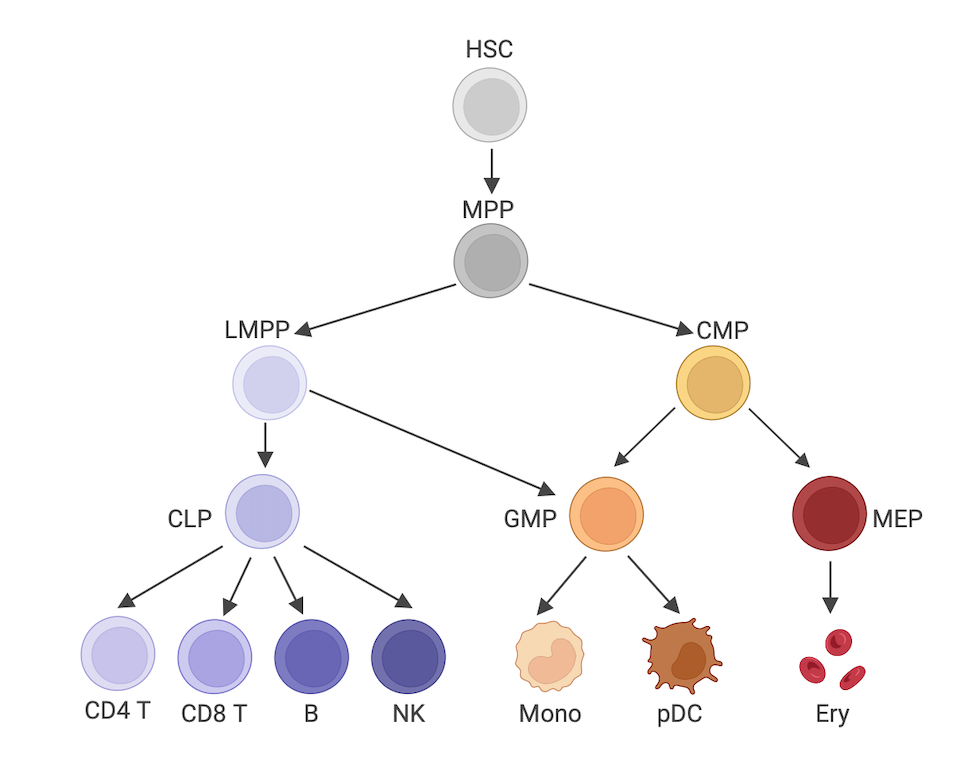

In [32]:
library("IRdisplay")

display_png(file="./hematopoiesis.png")


In [70]:
combined_regions =c()
for (df_ in  list(HSC_VS_MPP_df,
LMPP_VS_MPP_df,
CMP_VS_MPP_df,
CLP_VS_LMPP_df,
GMP_VS_LMPP_df,
CMP_VS_GMP_df,
CMP_VS_MEP_df,
CD4Tcell_VS_CLP_df, 
CD8Tcell_VS_CLP_df,
Bcell_VS_CLP_df,
NKcell_VS_CLP_df, 
Mono_VS_GMP_df, 
pDC_VS_GMP_df,                 
MEP_VS_ERY_df,
CD4Tcell_VS_CD8Tcell_df,
Bcell_VS_CD4Tcell_df,
CD4Tcell_VS_NKcell_df,
Bcell_VS_CD8Tcell_df,
CD8Tcell_VS_NKcell_df, 
Bcell_VS_NKcell_df,
Mono_VS_pDC_df)){    
    combined_regions =  c(combined_regions,df_[["region"]] )
    }

In [71]:
sum_=0
contrast_counter = 1
combined_regions_size =c()
for (df_ in list(HSC_VS_MPP_df,
LMPP_VS_MPP_df,
CMP_VS_MPP_df,
CLP_VS_LMPP_df,
GMP_VS_LMPP_df,
CMP_VS_GMP_df,
CMP_VS_MEP_df,
CD4Tcell_VS_CLP_df, 
CD8Tcell_VS_CLP_df,
Bcell_VS_CLP_df,
NKcell_VS_CLP_df, 
Mono_VS_GMP_df, 
pDC_VS_GMP_df,                 
MEP_VS_ERY_df,
CD4Tcell_VS_CD8Tcell_df,
Bcell_VS_CD4Tcell_df,
CD4Tcell_VS_NKcell_df,
Bcell_VS_CD8Tcell_df,
CD8Tcell_VS_NKcell_df, 
Bcell_VS_NKcell_df,
Mono_VS_pDC_df)){
    print(contrast_counter)
    contrast_counter=contrast_counter+1
    combined_regions_size = c(combined_regions_size,as.numeric(as.character(dim(df_)[1])) )
    print(dim(df_))
    sum_=sum_+as.integer(NROW(df_))
    }

[1] 1
[1] 307  12
[1] 2
[1] 12882    12
[1] 3
[1] 24853    12
[1] 4
[1] 54929    12
[1] 5
[1] 6028   12
[1] 6
[1] 40718    12
[1] 7
[1] 42712    12
[1] 8
[1] 65953    12
[1] 9
[1] 74891    12
[1] 10
[1] 34479    12
[1] 11
[1] 65647    12
[1] 12
[1] 64963    12
[1] 13
[1] 49034    12
[1] 14
[1] 82788    12
[1] 15
[1] 6840   12
[1] 16
[1] 52991    12
[1] 17
[1] 33845    12
[1] 18
[1] 57948    12
[1] 19
[1] 17378    12
[1] 20
[1] 50420    12
[1] 21
[1] 48436    12


In [79]:
# plot the number of diff regions per comparison

comparisons <- c('HSC_VS_MPP_df',
'LMPP_VS_MPP_df',
'CMP_VS_MPP_df',
'CLP_VS_LMPP_df',
'GMP_VS_LMPP_df',
'CMP_VS_GMP_df',
'CMP_VS_MEP_df',
'CD4Tcell_VS_CLP_df', 
'CD8Tcell_VS_CLP_df',
'Bcell_VS_CLP_df',
'NKcell_VS_CLP_df', 
'Mono_VS_GMP_df', 
'pDC_VS_GMP_df',                 
'MEP_VS_ERY_df',
'CD4Tcell_VS_CD8Tcell_df',
'Bcell_VS_CD4Tcell_df',
'CD4Tcell_VS_NKcell_df',
'Bcell_VS_CD8Tcell_df',
'CD8Tcell_VS_NKcell_df', 
'Bcell_VS_NKcell_df',
'Mono_VS_pDC_df')

num_diff_reg <- combined_regions_size 
num_diff_reg_per_comparison_df <- data.frame(comparisons,num_diff_reg)
num_diff_reg_per_comparison_df

comparisons,num_diff_reg
<chr>,<dbl>
HSC_VS_MPP_df,307
LMPP_VS_MPP_df,12882
CMP_VS_MPP_df,24853
CLP_VS_LMPP_df,54929
GMP_VS_LMPP_df,6028
CMP_VS_GMP_df,40718
CMP_VS_MEP_df,42712
CD4Tcell_VS_CLP_df,65953
CD8Tcell_VS_CLP_df,74891


In [80]:
library(tidyverse)
num_diff_reg_per_comparison_df %>% mutate(name = fct_reorder(comparisons, num_diff_reg))

comparisons,num_diff_reg,name
<chr>,<dbl>,<fct>
HSC_VS_MPP_df,307,HSC_VS_MPP_df
LMPP_VS_MPP_df,12882,LMPP_VS_MPP_df
CMP_VS_MPP_df,24853,CMP_VS_MPP_df
CLP_VS_LMPP_df,54929,CLP_VS_LMPP_df
GMP_VS_LMPP_df,6028,GMP_VS_LMPP_df
CMP_VS_GMP_df,40718,CMP_VS_GMP_df
CMP_VS_MEP_df,42712,CMP_VS_MEP_df
CD4Tcell_VS_CLP_df,65953,CD4Tcell_VS_CLP_df
CD8Tcell_VS_CLP_df,74891,CD8Tcell_VS_CLP_df


In [81]:
num_diff_reg_per_comparison_df = num_diff_reg_per_comparison_df[order(num_diff_reg_per_comparison_df$num_diff_reg),]

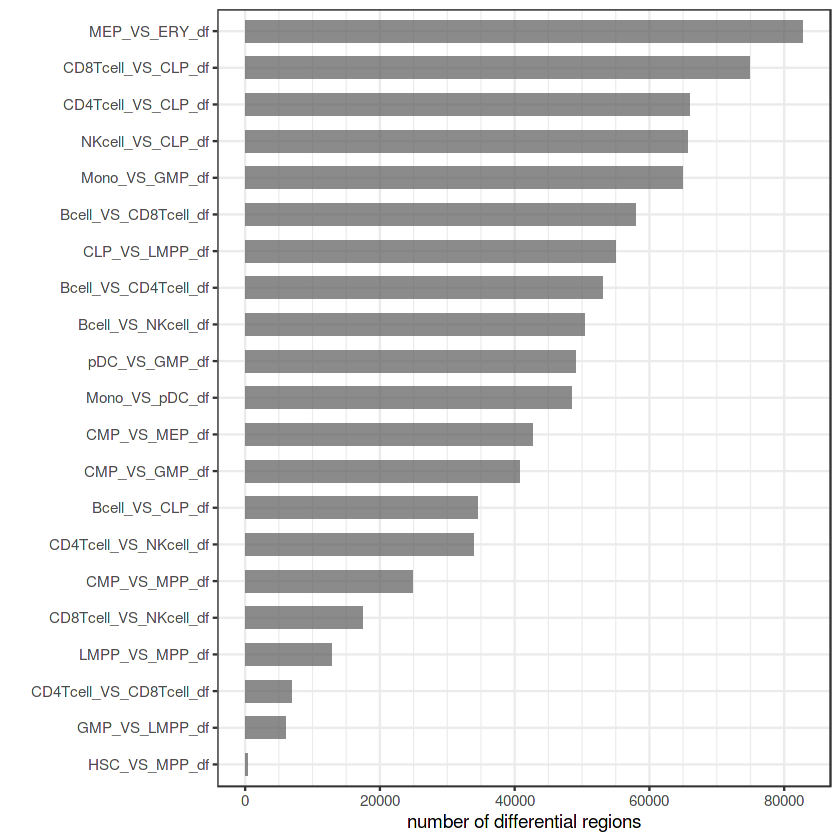

In [82]:
library(ggplot2)
library(dplyr)
library(forcats)
# Reorder following the value of another column:
plot_num_diff_regions_per_comparison <-num_diff_reg_per_comparison_df %>%
  mutate(comparisons = fct_reorder(comparisons, num_diff_reg)) %>%
  ggplot( aes(x=comparisons, y=num_diff_reg)) +
    geom_bar(stat="identity", , alpha=.7, width=.6) +
    coord_flip() +
    xlab("") + ylab("number of differential regions") +
    scale_y_continuous(minor_breaks = seq(0, 80000, 5000),) +
    theme_bw()
plot_num_diff_regions_per_comparison

In [83]:
ggsave("./figures/plot_num_diff_regions_per_comparison.png")


Saving 6.67 x 6.67 in image



In [84]:
combined_regions_unique = unique(combined_regions)

In [85]:
length(combined_regions_unique)

[1] 217337

## FILTER THE DIFFERENTIAL REGIONS:

### TOP 2000 REGIONS OF EACH PAIRWISE COMPARISON
#### ## remove the chrY regions

In [107]:
combined_regions_top2000 =c()
for (df_ in list(HSC_VS_MPP_df,
LMPP_VS_MPP_df,
CMP_VS_MPP_df,
CLP_VS_LMPP_df,
GMP_VS_LMPP_df,
CMP_VS_GMP_df,
CMP_VS_MEP_df,
CD4Tcell_VS_CLP_df, 
CD8Tcell_VS_CLP_df,
Bcell_VS_CLP_df,
NKcell_VS_CLP_df, 
Mono_VS_GMP_df, 
pDC_VS_GMP_df,                 
MEP_VS_ERY_df,
CD4Tcell_VS_CD8Tcell_df,
Bcell_VS_CD4Tcell_df,
CD4Tcell_VS_NKcell_df,
Bcell_VS_CD8Tcell_df,
CD8Tcell_VS_NKcell_df, 
Bcell_VS_NKcell_df,
Mono_VS_pDC_df)){
    df_= df_[df_[["seqnames"]] !="chrY",]
    top2000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:2000,][["region"]]
    top2000_merged_name = gsub(":", "_", gsub("-", "_", top2000_regions, fixed = TRUE) , fixed = TRUE)
    combined_regions_top2000 =  c(combined_regions_top2000,top2000_merged_name )
}

In [108]:
combined_regions_top2000[1:50]

[1] "chr10_111127422_111127822" "chr4_120830207_120830607" 
 [3] "chr9_16808878_16809278"    "chr10_98778301_98778701"  
 [5] "chr1_170041530_170042208"  "chr12_65565706_65566555"  
 [7] "chr5_132265294_132266643"  "chr3_105614305_105614705" 
 [9] "chr4_55254133_55254533"    "chr2_120245457_120245857" 
[11] "chr8_26765231_26765631"    "chr8_73520570_73521258"   
[13] "chr8_40172769_40173169"    "chr18_670490_670890"      
[15] "chr2_196809254_196809654"  "chr6_147283480_147283880" 
[17] "chr13_25352235_25352635"   "chr2_18516202_18516602"   
[19] "chr12_28583713_28584374"   "chr18_55811957_55812357"  
[21] "chr12_10959901_10960301"   "chr14_38123782_38125240"  
[23] "chrX_97866912_97867983"    "chr14_55383575_55384226"  
[25] "chr9_104850878_104851457"  "chr4_9936143_9936543"     
[27] "chr2_136322097_136322819"  "chr9_97567795_97568195"   
[29] "chr16_19640048_19640448"   "chr14_24984909_24985577"  
[31] "chr18_60978340_60978740"   "chr3_59877655_59878412"   
[33] "chr14_68269228_68269818"   "chr1_235937128_235937528" 
[35] "chr12_89083521_89083921"   "chr11_37929257_37929657"  
[37] "chr4_78691949_78692349"    "chr4_173288293_173289767" 
[39] "chr17_69703758_69704158"   "chr7_96303632_96304091"   
[41] "chr1_19325537_19325937"    "chr8_18729078_18729478"   
[43] "chr1_118136460_118137106"  "chr2_146873725_146874703" 
[45] "chr9_101569754_101570493"  "chr4_138406889_138407289" 
[47] "chr3_183988157_183988557"  "chr4_94550318_94550718"   
[49] "chr1_87435479_87435879"    "chr21_29641654_29642329"

In [109]:
combined_regions_top2000_sorted = sort(combined_regions_top2000)

In [110]:
library(tidyverse)
combined_regions_top2000_3col = as.data.frame(combined_regions_top2000_sorted) %>% 
   separate(combined_regions_top2000_sorted, into = c("seq", "start", "end"), sep="_")


In [111]:
head(combined_regions_top2000_3col)

,seq,start,end
,<chr>,<chr>,<chr>
1,chr10,100020267,100021260
2,chr10,100020267,100021260
3,chr10,100256987,100257387
4,chr10,100326930,100327825
5,chr10,100326930,100327825
6,chr10,100359054,100359835


In [112]:
tail(combined_regions_top2000_3col)


,seq,start,end
,<chr>,<chr>,<chr>
40302,chrX,97866912,97867983
40303,chrX,97909226,97909626
40304,chrX,98398599,98398999
40305,chrX,9899619,9900019
40306,chrX,9942098,9942498
40307,chrX,9942098,9942498


In [113]:
dim(combined_regions_top2000_3col)

[1] 40307     3

In [114]:
write.table(combined_regions_top2000_3col, "../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/all_BM_cell_types-for_NeurIPS_BM_sc_multiome/Corces2016_complete_and_Caldeon_pDC_treeGuided_differential_cCREs_FDR0.05.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)


## again: --> NOTE THAT THE PEAK REGIONS ARE MERGED DURING THE PROCESSING AND THE REGIONS GIVEN ABOVE NO LONGER CORRESPOND TO ENCODE cCREs. I NEED TO OBTAIN THE CORRESPONDING cCREs

In [115]:
exact_match_differential_cCREs_top2000_ = read.table("../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/all_BM_cell_types-for_NeurIPS_BM_sc_multiome/Corces2016_complete_and_Caldeon_pDC_treeGuided_differential_cCREs_FDR0.05_sorted_exactCREs.bed", header = FALSE, sep="\t")

In [116]:
head(exact_match_differential_cCREs_top2000_)

,V1,V2,V3
,<chr>,<int>,<int>
1,chr1,1216791,1217011
2,chr1,1217013,1217334
3,chr1,1607107,1607413
4,chr1,1629532,1629772
5,chr1,1629775,1630119
6,chr1,1677810,1678155


In [117]:
dim(exact_match_differential_cCREs_top2000_)

[1] 32593     3

In [118]:
exact_match_differential_cCREs_top2000_["region"]=paste(exact_match_differential_cCREs_top2000_$V1, exact_match_differential_cCREs_top2000_$V2, exact_match_differential_cCREs_top2000_$V3, sep="_")

In [119]:
head(exact_match_differential_cCREs_top2000_)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,1216791,1217011,chr1_1216791_1217011
2,chr1,1217013,1217334,chr1_1217013_1217334
3,chr1,1607107,1607413,chr1_1607107_1607413
4,chr1,1629532,1629772,chr1_1629532_1629772
5,chr1,1629775,1630119,chr1_1629775_1630119
6,chr1,1677810,1678155,chr1_1677810_1678155


In [120]:
write.table(exact_match_differential_cCREs_top2000_["region"], "../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/all_BM_cell_types-for_NeurIPS_BM_sc_multiome/Corces2016_complete_and_Caldeon_pDC_treeGuided_differential_cCREs_FDR0.05_sorted_exactCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)


In [122]:
saveRDS(corces_norm, "./WS/all_BM_cell_types-for_NeurIPS_BM_sc_multiome_corces_norm.RDS")
